In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("awaiskaggler/insurance-csv")

print("Path to dataset files:", path)

100%|██████████| 13.4k/13.4k [00:00<00:00, 11.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/awaiskaggler/insurance-csv/versions/1


In [2]:
import pandas as pd
import os

# Get the downloaded file path
csv_file = os.path.join(path, "insurance.csv")  # Update the filename if different

# Load and print the dataset
df = pd.read_csv(csv_file)
print(df.head())  # Display the first 5 rows


   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [7]:
df.shape

(1338, 7)

Question 1: Binomial Probability in Insurance Claims

(a) Assume that 30% of the people in the dataset are smokers. If we randomly select 10 individuals from the dataset, what is the probability that at least 4 of them are smokers? Use the Binomial Probability Distribution formula to compute this and compare the result using the pbinom function in Python.

(b) Plot the Binomial Distribution for this scenario using matplotlib and label the probabilities accordingly.

Probability of selecting at least 4 smokers (Manual Computation): 0.3504
Probability of selecting at least 4 smokers (Using scipy CDF): 0.3504


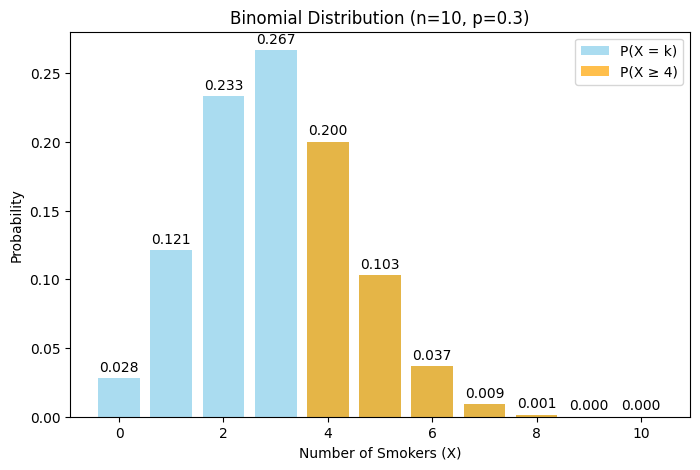

In [8]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Given values
n = 10      # Number of trials
p = 0.30    # Probability of success (smoker)

# Compute P(X ≥ 4) manually using 1 - P(X ≤ 3)
cumulative_prob = sum(stats.binom.pmf(k, n, p) for k in range(4))
p_at_least_4 = 1 - cumulative_prob

# Compute using Python's pbinom equivalent (cumulative distribution function)
p_at_least_4_scipy = 1 - stats.binom.cdf(3, n, p)

# Print probabilities
print(f"Probability of selecting at least 4 smokers (Manual Computation): {p_at_least_4:.4f}")
print(f"Probability of selecting at least 4 smokers (Using scipy CDF): {p_at_least_4_scipy:.4f}")

# Plot the Binomial Distribution
x = np.arange(0, n+1)
y = stats.binom.pmf(x, n, p)

plt.figure(figsize=(8, 5))
plt.bar(x, y, color="skyblue", alpha=0.7, label="P(X = k)")
plt.xlabel("Number of Smokers (X)")
plt.ylabel("Probability")
plt.title("Binomial Distribution (n=10, p=0.3)")

# Highlight probabilities for X >= 4
plt.bar(x[4:], y[4:], color="orange", alpha=0.7, label="P(X ≥ 4)")

# Annotate probabilities
for i, prob in enumerate(y):
    plt.text(i, prob + 0.005, f"{prob:.3f}", ha="center", fontsize=10)

plt.legend()
plt.show()


Question 2: Risk Estimation Using Binomial Distribution

(a) Suppose that in the dataset, 20% of individuals have medical expenses above $20,000. If an insurance company selects 15 random individuals, what is the probability that exactly 5 of them will have charges above $20,000? Use the dbinom function to calculate this.

(b) Find the cumulative probability that at most 5 people in a random sample of 15 will have medical expenses above $20,000 using pbinom.

(c) Plot the cumulative probability distribution function (CDF) using pbinom and Visualize package.

Probability that exactly 5 people have expenses > $20,000: 0.1032
Probability that at most 5 people have expenses > $20,000: 0.9389


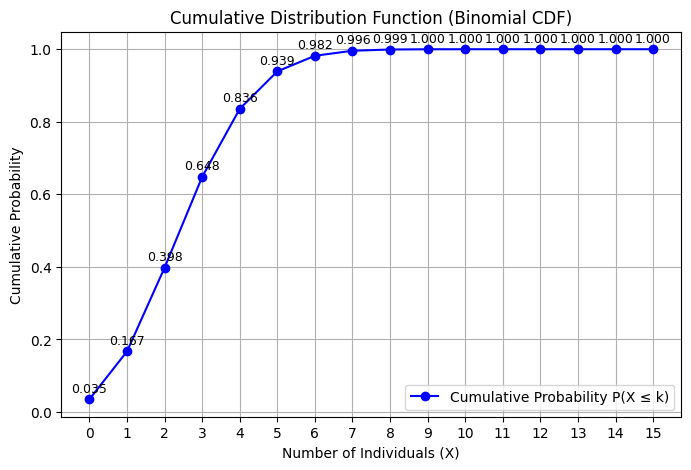

In [9]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Given values
n = 15     # Number of trials (individuals)
p = 0.20   # Probability of success (expenses > $20,000)

# (a) Compute P(X = 5) using binomial PMF
p_exact_5 = stats.binom.pmf(5, n, p)

# (b) Compute P(X ≤ 5) using binomial CDF
p_cumulative_5 = stats.binom.cdf(5, n, p)

# Print results
print(f"Probability that exactly 5 people have expenses > $20,000: {p_exact_5:.4f}")
print(f"Probability that at most 5 people have expenses > $20,000: {p_cumulative_5:.4f}")

# (c) Plot the Binomial CDF
x = np.arange(0, n+1)
y = stats.binom.cdf(x, n, p)

plt.figure(figsize=(8, 5))
plt.plot(x, y, marker="o", linestyle="-", color="blue", label="Cumulative Probability P(X ≤ k)")
plt.xlabel("Number of Individuals (X)")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function (Binomial CDF)")
plt.xticks(range(n+1))
plt.grid()

# Annotate CDF values
for i, prob in zip(x, y):
    plt.text(i, prob + 0.02, f"{prob:.3f}", ha="center", fontsize=9)

plt.legend()
plt.show()


Question 3: Estimating Regional Smoking Rates Using Binomial Approximation

(a) Suppose that in the dataset, the probability of being a smoker varies by region:

Southwest: 25% smokers
Southeast: 30% smokers
Northwest: 20% smokers
Northeast: 35% smokers
Using the rbinom function, simulate 1000 samples from a binomial distribution for each region with n=50 individuals.

(b) Using the simulated data, visualize the distribution of smokers per region with a bar chart.

(c) Compute the expected number of smokers per region for n=50 using the Binomial Expectation formula and compare it with the simulated results.

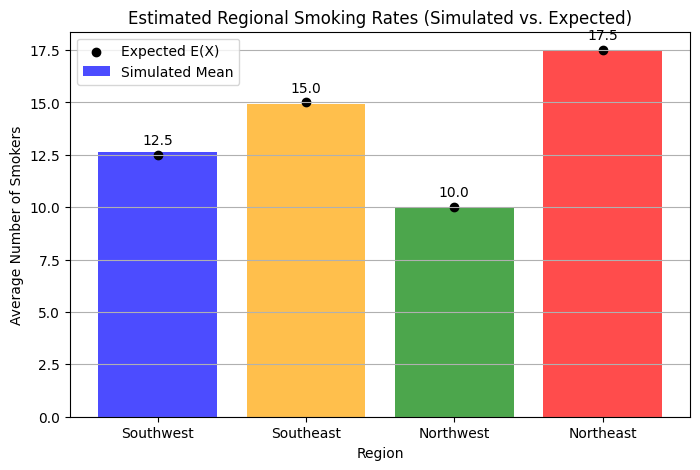

Southwest: Simulated Mean = 12.61, Expected = 12.50
Southeast: Simulated Mean = 14.92, Expected = 15.00
Northwest: Simulated Mean = 10.03, Expected = 10.00
Northeast: Simulated Mean = 17.47, Expected = 17.50


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Given probabilities for each region
regions = ["Southwest", "Southeast", "Northwest", "Northeast"]
probabilities = [0.25, 0.30, 0.20, 0.35]
n = 50  # Number of individuals per region
num_simulations = 1000

# (a) Simulate 1000 trials for each region
simulated_smokers = {region: np.random.binomial(n, p, num_simulations) for region, p in zip(regions, probabilities)}

# Compute mean smokers per region from simulation
simulated_means = {region: np.mean(values) for region, values in simulated_smokers.items()}

# (b) Plot bar chart of simulated smoker distributions
plt.figure(figsize=(8, 5))
plt.bar(regions, simulated_means.values(), color=['blue', 'orange', 'green', 'red'], alpha=0.7, label="Simulated Mean")

# (c) Compute expected smokers using E(X) = n * p
expected_smokers = {region: n * p for region, p in zip(regions, probabilities)}

# Overlay expected values
plt.scatter(regions, expected_smokers.values(), color='black', marker="o", label="Expected E(X)")

# Labels and legend
plt.xlabel("Region")
plt.ylabel("Average Number of Smokers")
plt.title("Estimated Regional Smoking Rates (Simulated vs. Expected)")
plt.legend()
plt.grid(axis='y')

# Annotate the expected values
for region, value in expected_smokers.items():
    plt.text(region, value + 0.5, f"{value:.1f}", ha='center', fontsize=10, color='black')

plt.show()

# Print results
for region in regions:
    print(f"{region}: Simulated Mean = {simulated_means[region]:.2f}, Expected = {expected_smokers[region]:.2f}")


Question 4: Inverse Probability & Quantile Function for Insurance Risks

(a) Suppose that a health policy is issued to individuals where the top 10% most expensive medical claims need to be classified as high-risk.

Use the qbinom function to find the threshold insurance charge above which an individual is considered high-risk.
(b) Find the probability of randomly selecting 8 high-risk individuals in a sample of 30 policyholders.

(c) Plot the Probability Mass Function (PMF) using dbinom to visualize this scenario.

High-risk threshold: $34831.72
Probability of selecting exactly 8 high-risk individuals: 0.00576


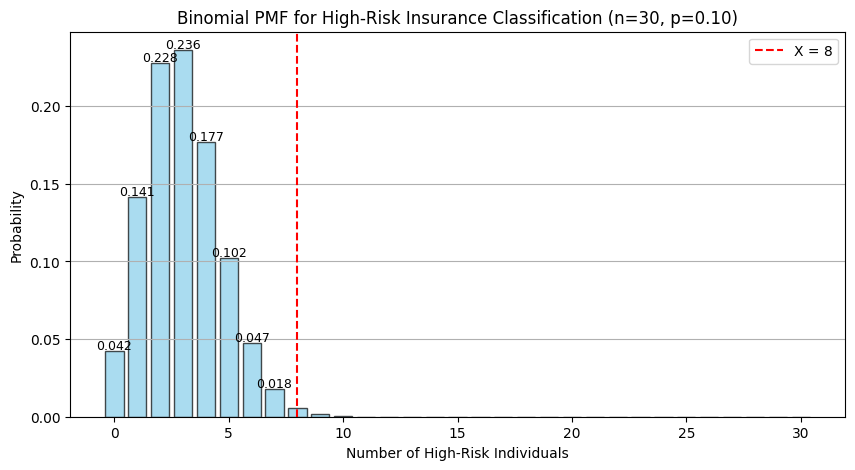

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# (a) Find the 90th percentile charge (high-risk threshold)
high_risk_threshold = np.percentile(df["expenses"], 90)
print(f"High-risk threshold: ${high_risk_threshold:.2f}")

# (b) Compute the probability of exactly 8 high-risk individuals in a sample of 30
n = 30  # Number of policyholders
k = 8   # High-risk individuals
p = 0.10  # Probability of being high-risk

prob_8_high_risk = stats.binom.pmf(k, n, p)
print(f"Probability of selecting exactly 8 high-risk individuals: {prob_8_high_risk:.5f}")

# (c) Plot the PMF for the binomial distribution
x = np.arange(0, n + 1)  # Possible high-risk individuals (0 to 30)
pmf_values = stats.binom.pmf(x, n, p)

plt.figure(figsize=(10, 5))
plt.bar(x, pmf_values, color="skyblue", edgecolor="black", alpha=0.7)
plt.axvline(x=k, color='red', linestyle="dashed", label="X = 8")
plt.xlabel("Number of High-Risk Individuals")
plt.ylabel("Probability")
plt.title("Binomial PMF for High-Risk Insurance Classification (n=30, p=0.10)")
plt.legend()
plt.grid(axis="y")

# Annotate probability values
for i in range(len(x)):
    if pmf_values[i] > 0.01:  # Only annotate significant values
        plt.text(i, pmf_values[i] + 0.001, f"{pmf_values[i]:.3f}", ha="center", fontsize=9)

plt.show()


Question 5: Modeling the Probability of Having More than 3 Children

(a) The dataset suggests that 40% of individuals have more than 3 children. If we randomly pick 12 individuals,

Calculate the probability that at least 5 of them have more than 3 children using pbinom.
Compare it with manual calculations using the Binomial formula.
(b) Simulate 1000 random samples from a binomial distribution using rbinom for n=12 individuals and p=0.4, then visualize the histogram.

(c) Compare the mean and variance of the simulated results with the theoretical Binomial distribution.

Probability that at least 5 individuals have more than 3 children: 0.56182


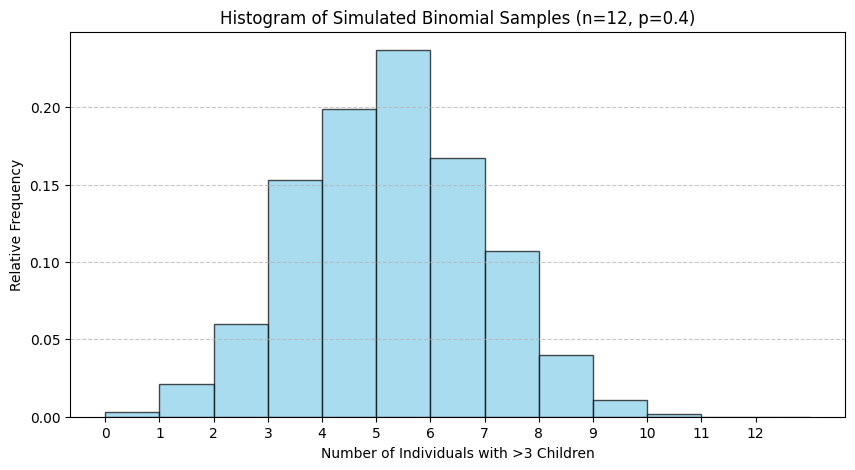

Simulated Mean: 4.77, Theoretical Mean: 4.80
Simulated Variance: 2.89, Theoretical Variance: 2.88


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Given values
n = 12  # Number of individuals
p = 0.40  # Probability of having more than 3 children
k_threshold = 5  # At least 5 individuals

# (a) Compute probability P(X >= 5) using Binomial CDF
p_x_less_than_5 = stats.binom.cdf(k_threshold - 1, n, p)
p_x_greater_than_5 = 1 - p_x_less_than_5

print(f"Probability that at least 5 individuals have more than 3 children: {p_x_greater_than_5:.5f}")

# (b) Simulate 1000 samples from Binomial Distribution
num_samples = 1000
simulated_data = np.random.binomial(n, p, num_samples)

# Plot histogram of simulated data
plt.figure(figsize=(10, 5))
plt.hist(simulated_data, bins=range(0, n+2), edgecolor='black', alpha=0.7, color='skyblue', density=True)
plt.xlabel("Number of Individuals with >3 Children")
plt.ylabel("Relative Frequency")
plt.title("Histogram of Simulated Binomial Samples (n=12, p=0.4)")
plt.xticks(range(n+1))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# (c) Compare simulated mean & variance with theoretical values
simulated_mean = np.mean(simulated_data)
simulated_variance = np.var(simulated_data, ddof=1)

theoretical_mean = n * p
theoretical_variance = n * p * (1 - p)

print(f"Simulated Mean: {simulated_mean:.2f}, Theoretical Mean: {theoretical_mean:.2f}")
print(f"Simulated Variance: {simulated_variance:.2f}, Theoretical Variance: {theoretical_variance:.2f}")
